
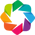

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
hv.extension('bokeh')

# Interactive notebook in nbviewer example

In [2]:
import numpy as np

from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var A = amp.value;
    var k = freq.value;
    var phi = phase.value;
    var B = offset.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider = Slider(start=0.1, end=10, value=1, step=.1,
                    title="Amplitude", callback=callback)
callback.args["amp"] = amp_slider

freq_slider = Slider(start=0.1, end=10, value=1, step=.1,
                     title="Frequency", callback=callback)
callback.args["freq"] = freq_slider

phase_slider = Slider(start=0, end=6.4, value=0, step=.1,
                      title="Phase", callback=callback)
callback.args["phase"] = phase_slider

offset_slider = Slider(start=-5, end=5, value=0, step=.1,
                       title="Offset", callback=callback)
callback.args["offset"] = offset_slider

layout = row(
    plot,
    widgetbox(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

In [3]:
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')
key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, kdims=key_dimensions, vdims=value_dimensions)

In [4]:
%%opts Overlay [width=700 height=400 show_frame=False]
%%opts Curve (color='k') Scatter [color_index=2 size_index=2 scaling_factor=1.4] (cmap='Blues' line_color='k')
%%opts VLine (color='k' line_width=1)
%%opts Text (text_font_size='13px')
gdp_curves = macro.to.curve('Year', 'GDP Growth')
gdp_unem_scatter = macro.to.scatter('Year', ['GDP Growth', 'Unemployment'])
annotations = hv.Arrow(1973, 8, 'Oil Crisis', 'v') * hv.Arrow(1975, 6, 'Stagflation', 'v') *\
hv.Arrow(1979, 8, 'Energy Crisis', 'v') * hv.Arrow(1981.9, 5, 'Early Eighties\n Recession', 'v')
gdp_curves * gdp_unem_scatter* annotations

:HoloMap   [country]
   :Overlay
      .Curve.I   :Curve   [year]   (gdp)
      .Scatter.I :Scatter   [year]   (gdp,unem)
      .Arrow.I   :Arrow   [x,y]
      .Arrow.II  :Arrow   [x,y]
      .Arrow.III :Arrow   [x,y]
      .Arrow.IV  :Arrow   [x,y]

In [5]:
class DragonCurve(object):
    "L-system agent that follows rules to generate the Dragon Curve"
    
    initial ='FX'
    productions = {'X':'X+YF+', 'Y':'-FX-Y'}
    dragon_rules = {'F': lambda t,d,a: t.forward(d),
                    'B': lambda t,d,a: t.back(d),
                    '+': lambda t,d,a: t.rotate(-a),
                    '-': lambda t,d,a: t.rotate(a),
                    'X':lambda t,d,a: None,
                    'Y':lambda t,d,a: None }
    
    def __init__(self, x=0,y=0, iterations=1):
        self.heading = 0
        self.distance = 5
        self.angle = 90
        self.x, self.y = x,y
        self.trace = [(self.x, self.y)]
        self.process(self.expand(iterations), self.distance, self.angle)
        
    def process(self, instructions, distance, angle):
        for i in instructions:          
            self.dragon_rules[i](self, distance, angle)
        
    def expand(self, iterations):
        "Expand an initial symbol with the given production rules"
        expansion = self.initial
        
        for i in range(iterations):
            intermediate = ""
            for ch in expansion:
                intermediate = intermediate + self.productions.get(ch,ch)
            expansion = intermediate
        return expansion

    def forward(self, distance):
        self.x += np.cos(2*np.pi * self.heading/360.0)
        self.y += np.sin(2*np.pi * self.heading/360.0)
        self.trace.append((self.x,self.y))
    
    def rotate(self, angle):
        self.heading += angle
        
    def back(self, distance):
        self.heading += 180
        self.forward(distance)
        self.heading += 180
        
    @property
    def path(self):
        return hv.Path([self.trace])

In [6]:
%%opts Path {+framewise} [xaxis=None yaxis=None title_format=''] (color='black' line_width=1)

def pad_extents(path):
    "Add 5% padding around the path"
    minx, maxx = path.range('x')
    miny, maxy = path.range('y')
    xpadding = ((maxx-minx) * 0.1)/2
    ypadding = ((maxy-miny) * 0.1)/2
    path.extents = (minx-xpadding, miny-ypadding, maxx+xpadding, maxy+ypadding)
    return path
    
hmap = hv.HoloMap(kdims=['Iteration'])
for i in range(7,17):
    path = DragonCurve(-200, 0, i).path
    hmap[i] = pad_extents(path)
hmap

:HoloMap   [Iteration]
   :Path   [x,y]

In [7]:
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')
key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, kdims=key_dimensions, vdims=value_dimensions)

In [8]:
%%opts Scatter [width=700 height=400 scaling_method='width' scaling_factor=2 size_index=2 show_grid=True] 
%%opts Scatter (color=Cycle('Category20') line_color='k')
%%opts NdOverlay [legend_position='left' show_frame=False]
gdp_unem_scatter = macro.to.scatter('Year', ['GDP Growth', 'Unemployment'])
gdp_unem_scatter.overlay('Country')

:NdOverlay   [country]
   :Scatter   [year]   (gdp,unem)

In [9]:
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]

county_polys = {name: hv.Polygons((xs, ys), level=rate, vdims=['Unemployment'])
                for name, xs, ys, rate in zip(county_names, county_xs, county_ys, county_rates)}

choropleth = hv.NdOverlay(county_polys, kdims=['County'])

In [10]:
plot_opts = dict(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                 show_grid=False, show_frame=False, width=500, height=500)
style = dict(line_color='white')

choropleth({'Polygons': {'style': style, 'plot': plot_opts}})

:NdOverlay   [County]
   :Polygons   [x,y]   (Unemployment)

In [11]:
%%html
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>